# Militiary Aircraft Detection

## Description
- Detection of military aircraft using Object Detection.

## About Dataset
- The dataset contains 12008 images.
- 43 aircraft types.
- Bounding box in PASCAL VOC format (xmin, ymin, xmax, ymax, width, height).

## Models Tried
- YoloV8s

## Metrics Used
- Mean Average Precision (mAP)

## 1. Importing the Libraries

In [1]:
import torch
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import shutil
import os, random

from pathlib import Path

## 2. Preprocessing the data

In [6]:
# separating images and annotations paths
src_path = "D:/Projects/Military Aircraft Detection/Local/kaggle/input/militaryaircraftdetectiondataset/dataset/"
images = sorted([src_path + img for img in os.listdir(src_path) if ".csv" not in img])
labels = sorted([src_path + lab for lab in os.listdir(src_path) if ".jpg" not in lab])

In [8]:
images[0], labels[0]

('D:/Projects/Military Aircraft Detection/Local/kaggle/input/militaryaircraftdetectiondataset/dataset/000106393cfe2343888c584e65fd2274.jpg',
 'D:/Projects/Military Aircraft Detection/Local/kaggle/input/militaryaircraftdetectiondataset/dataset/000106393cfe2343888c584e65fd2274.csv')

In [7]:
len(images), len(labels)

(12008, 12008)

In [6]:
# creating folders for train and test datasets
os.makedirs("Dataset/train/images", exist_ok=True)
os.makedirs("Dataset/train/labels", exist_ok=True)
os.makedirs("Dataset/valid/images", exist_ok=True)
os.makedirs("Dataset/valid/labels", exist_ok=True)

In [7]:
split_size = int(len(labels) * 0.8)
split_size

9606

In [8]:
def center_annotation_conversion(xmin, xmax, ymin, ymax, width, height):
  """
  Transforms the Pascal VOC annotations to YOLO format
  """
  centerX = ((xmin + xmax) / 2) / width
  centerY = ((ymin + ymax) / 2) / height
  new_width = (xmax - xmin) / width
  new_height = (ymax - ymin) / height
  return centerX, centerY, new_width, new_height

In [9]:
def calculate_yolo_bounding_box_area(xmin, xmax, ymin, ymax):
  """
  Calculates the area of the bounding box
  """
  width = xmax - xmin
  height = ymax - ymin

  area = width * height

  return True if abs(area) > 20000 else False

In [ ]:
train_images_path = "Dataset/train/images/"
train_labels_path = "Dataset/train/labels/"

test_images_path = "Dataset/valid/images/"
test_labels_path = "Dataset/valid/labels/"

In [10]:
class_id_counter = 0
classes_dictionary = dict()
img_copied_counter = 0

# transforming the annotations and moving images and labels to train folder
for sample in range(split_size):
    img_file, label_file = images[sample], labels[sample]
    shutil.move(img_file, train_images_path)
    data = pd.read_csv(label_file)

    with open(train_labels_path + data.loc[0]["filename"] + ".txt", "w") as f:
      for values in range(len(data)):
        xmin = data.loc[values]["xmin"]
        xmax = data.loc[values]["xmax"]
        ymin = data.loc[values]["ymin"]
        ymax = data.loc[values]["ymax"]
        width = data.loc[values]["width"]
        height = data.loc[values]["height"]
        cls = data.loc[values]["class"]

        if not calculate_yolo_bounding_box_area(xmin, xmax, ymin, ymax):
          continue

        if cls not in classes_dictionary:
          classes_dictionary[cls] = class_id_counter
          class_id=classes_dictionary[cls]
          class_id_counter += 1

        else:
          class_id = classes_dictionary[cls]

        centerX, centerY, new_width, new_height = center_annotation_conversion(xmin,
                                                                          xmax,
                                                                          ymin,
                                                                          ymax,
                                                                          width,
                                                                          height)
        f.write(str(class_id) + " " + str(centerX) + " " + str(centerY) + " " + str(new_width) + " " + str(new_height) + "\n")
      
    with open(train_labels_path + data.loc[0]["filename"] + ".txt", "r") as f:
      if not f.readlines():
        f.close()
        os.remove(train_labels_path + data.loc[0]["filename"] + ".txt")
        os.remove(train_images_path + data.loc[0]["filename"] + ".jpg")
        
      else:
        img_copied_counter += 1

print(f"{img_copied_counter} images and labels copied out of {split_size} images")

8206 images and labels copied out of 9606 images


In [11]:
# checking the total train images and labels
len(os.listdir(train_images_path)), len(os.listdir(train_labels_path))

(8206, 8206)

In [13]:
# # transforming the annotations and moving images and labels to test folder

img_copied_counter = 0
for sample in range(split_size, len(labels)):
    img_file, label_file = images[sample], labels[sample]
    shutil.move(img_file, valid_images_path)
    data = pd.read_csv(label_file)

    with open(valid_labels_path + data.loc[0]["filename"] + ".txt", "w") as f:
      for values in range(len(data)):
        xmin = data.loc[values]["xmin"]
        xmax = data.loc[values]["xmax"]
        ymin = data.loc[values]["ymin"]
        ymax = data.loc[values]["ymax"]
        width = data.loc[values]["width"]
        height = data.loc[values]["height"]
        cls = data.loc[values]["class"]
        class_id = classes_dictionary[cls]

        if not calculate_yolo_bounding_box_area(xmin, xmax, ymin, ymax):
          continue

        centerX, centerY, new_width, new_height = center_annotation_conversion(xmin,
                                                                          xmax,
                                                                          ymin,
                                                                          ymax,
                                                                          width,
                                                                          height)
        f.write(str(class_id) + " " + str(centerX) + " " + str(centerY) + " " + str(new_width) + " " + str(new_height) + "\n")
    
    with open(valid_labels_path + data.loc[0]["filename"] + ".txt", "r") as f:
      if not f.readlines():
        f.close()
        os.remove(valid_labels_path + data.loc[0]["filename"] + ".txt")
        os.remove(valid_images_path + data.loc[0]["filename"] + ".jpg")
        
      else:
        img_copied_counter += 1

print(f"{img_copied_counter} images and labels copied out of {int(len(labels) * 0.2)} images")

2076 images and labels copied out of 2401 images


In [26]:
len(os.listdir(valid_images_path)), len(os.listdir(valid_labels_path))

(2076, 2076)

In [25]:
classes_dictionary

{'F16': 0,
 'F18': 1,
 'F22': 2,
 'F35': 3,
 'JAS39': 4,
 'B52': 5,
 'US2': 6,
 'Be200': 7,
 'EF2000': 8,
 'C2': 9,
 'E2': 10,
 'XB70': 11,
 'F15': 12,
 'B2': 13,
 'Tu160': 14,
 'C5': 15,
 'Mig31': 16,
 'B1': 17,
 'A10': 18,
 'V22': 19,
 'F117': 20,
 'C130': 21,
 'E7': 22,
 'AG600': 23,
 'RQ4': 24,
 'SR71': 25,
 'Mirage2000': 26,
 'AV8B': 27,
 'Tu95': 28,
 'Rafale': 29,
 'A400M': 30,
 'F14': 31,
 'F4': 32,
 'YF23': 33,
 'MQ9': 34,
 'Su34': 35,
 'C17': 36,
 'Tornado': 37,
 'J20': 38,
 'Su57': 39,
 'Vulcan': 40,
 'U2': 41,
 'P3': 42}

In [15]:
len(classes_dictionary)

43

In [16]:
for dirpath, dirnames, filenames in os.walk("Dataset/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'Dataset/'.
There are 2 directories and 0 images in 'Dataset/train'.
There are 0 directories and 8206 images in 'Dataset/train\images'.
There are 0 directories and 8206 images in 'Dataset/train\labels'.
There are 2 directories and 0 images in 'Dataset/valid'.
There are 0 directories and 2076 images in 'Dataset/valid\images'.
There are 0 directories and 2076 images in 'Dataset/valid\labels'.


In [27]:
class_names = [cls for cls in classes_dictionary.keys()]
len(class_names)

43

In [23]:
def plot_bounding_boxes(img_path, coordinates_file_path):
  """
  Plots the bounding box in a given image
  """
  # Load your image
  image = cv2.imread(img_path)
  with open(coordinates_file_path, "r") as f:
    coordinates = f.readlines()

  for i in range(len(coordinates)):
    coordinate = coordinates[i].split(" ")
    coordinate[-1] = coordinate[-1][:-1]
    coordinate[0] = int(coordinate[0])
    coordinate[1:] = [i for i in map(float, coordinate[1:])]
    # Bounding box coordinates and size (normalized)
    cls, x_center_normalized, y_center_normalized, width_normalized, height_normalized = coordinate

    # Convert normalized coordinates and size to pixel values
    image_height, image_width, _ = image.shape
    x_center = int(x_center_normalized * image_width)
    y_center = int(y_center_normalized * image_height)
    width = int(width_normalized * image_width)
    height = int(height_normalized * image_height)

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x_min = x_center - (width // 2)
    y_min = y_center - (height // 2)
    x_max = x_center + (width // 2)
    y_max = y_center + (height // 2)

    # Draw the bounding box rectangle
    color = (255, 0, 0)  # Green color in BGR
    thickness = 20       # Line thickness
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

    # Display the image with the bounding box
    plt.axis("off")
    plt.title(class_names[cls])
    plt.imshow(image)

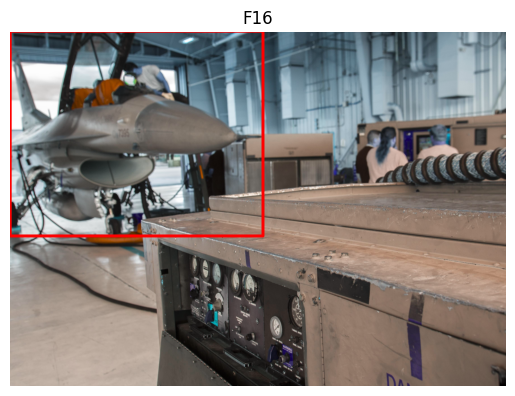

In [24]:
sample_img = "Dataset/train/images/" + sorted(os.listdir("Dataset/train/images"))[0]
sample_bbox = "Dataset/train/labels/" + sorted(os.listdir("Dataset/train/labels"))[0]
plot_bounding_boxes(sample_img, sample_bbox)

In [25]:
# verifying the class index
pd.read_csv("D:\Projects\Military Aircraft Detection\Local/kaggle/input/militaryaircraftdetectiondataset/dataset/" + sorted(os.listdir("Dataset/train/labels"))[0][:-3] + "csv")

filename  width  height class  xmin  ymin  xmax  \
0  000106393cfe2343888c584e65fd2274   3520    2514   F16     1     1  1796   

   ymax  
0  1451

## 4. Building the Model

### 4.1. YoloV8s

In [26]:
%%writefile Dataset/data.yaml
train: D:/Projects/Military Aircraft Detection/Local/Dataset/train/images
val: D:/Projects/Military Aircraft Detection/Local/Dataset/valid/images

nc: 43

names: ['F16', 'F18', 'F22', 'F35', 'JAS39', 'B52', 'US2', 'Be200', 'EF2000', 'C2', 'E2', 'Rafale', 'XB70', 'F15', 'B2', 'Tu160', 'C5', 'Mig31', 'B1', 'A10', 'V22', 'F117', 'C130', 'E7', 'U2', 'AG600', 'RQ4', 'SR71', 'Mirage2000', 'AV8B', 'Tu95', 'A400M', 'MQ9', 'F14', 'F4', 'YF23', 'Su34', 'C17', 'Tornado', 'J20', 'Su57', 'Vulcan', 'P3']

Overwriting Dataset/data.yaml


In [17]:
# Load the model
model_1_yolov8s = YOLO("/kaggle/input/checkpoints3/last.pt")

# Training
model_1_50_epochs_results = model_1_yolov8s.train(
   data='/kaggle/working/Dataset/data.yaml',
   imgsz=640,
   epochs=50,
   batch=32,
   name='yolov8s',
   resume=True
)

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/checkpoints3/last.pt, data=/kaggle/working/Dataset/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [19]:
# zipping the results for downloading
!zip -r yolov8.zip /kaggle/working/runs/detect/yolov8s

  adding: kaggle/working/runs/detect/yolov8s/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8s/train_batch12040.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/yolov8s/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8s/weights/best.pt (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8s/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8s/confusion_matrix_normalized.png (deflated 21%)
  adding: kaggle/working/runs/detect/yolov8s/val_batch2_pred.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/yolov8s/F1_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/yolov8s/train_batch12042.jpg (deflated 14%)
  adding: kaggle/working/runs/detect/yolov8s/val_batch1_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8s/val_batch1_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/detect/yolov8s/R_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/yolov8s/results.png (deflated 7%)
  adding: kaggle/

In [20]:
# evaluating the model
model.val()

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11142225 parameters, 0 gradients
val: Scanning /kaggle/working/Dataset/valid/labels.cache... 2400 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2402/2402 [00:00<?, ?it/s]
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/cdfa23ff0a31e26db5af2ea32a07317e.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/d317123762f868d87ef908cff801fe6f.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/d37af747d93eb94c18d0c7150b845af2.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/d4a19e6524ed06786bc75802388069cd.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/d9005561d68c4a89f95a3257374a0b2f.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/Dataset/valid/images/e704da53011ed94a1644bec7ffc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0f0b6ee860>
fitness: 0.5719651955132874
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.42215,     0.39687,     0.41409,     0.43864,     0.51475,     0.61173,     0.84607,      0.8423,     0.36605,     0.76742,     0.51567,     0.22412,      0.6173,     0.72973,     0.41678,      0.5497,     0.63545,     0.61479,     0.56365,      0.3889,     0.55006,     0.51542,     0.43045,     0.86881,
           0.70153,     0.89533,     0.58604,     0.70735,     0.36712,     0.64619,      0.4892,     0.68707,     0.76534,     0.36299,     0.42133,     0.47773,

In [27]:
# training the model for 100 epochs
# Load the model
model_1_yolov8s_100_epochs = YOLO("yolov8s.pt")

# Training
model_1_yolov8s_100_epochs_results = model_1_yolov8s_100_epochs.train(
   data='Dataset/data.yaml',
   imgsz=640,
   epochs=100,
   batch=5,
   name='yolov8s_100_epochs',
)

Ultralytics YOLOv8.0.190  Python-3.10.13 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=Dataset/data.yaml, epochs=100, patience=50, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_100_epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [49]:
all_images = [img[:-3] + "jpg" for img in os.listdir("D:/Projects/Military Aircraft Detection/Local/kaggle/input/militaryaircraftdetectiondataset/dataset")]
train_val_images = os.listdir(train_images_path) 
train_val_images.extend(os.listdir(valid_images_path))
ignored_images = [i for i in all_images if i not in train_val_images]

len(ignored_images)

1726

In [50]:
12008 - (8206 + 2076)

1726

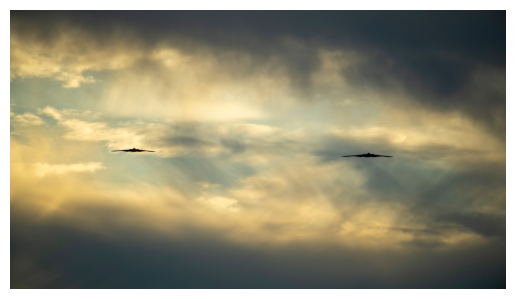

In [62]:
plt.imshow(plt.imread("D:/Projects/Military Aircraft Detection/Local/archive\dataset/" + ignored_images[5]))
plt.axis("off");

In [3]:
model_1_yolov8s_100_epochs = YOLO("D:\\Projects\\Military Aircraft Detection\\Local\\runs\\detect\\yolov8s_100_epochs\\weights\\best.pt")


image 1/1 d:\Projects\Military Aircraft Detection\Local\Dataset\valid\images\f4c2b8fcf9a3b338d524b28c3d6ec726.jpg: 448x640 2 F18s, 120.7ms
Speed: 5.1ms preprocess, 120.7ms inference, 8.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict

image 1/1 d:\Projects\Military Aircraft Detection\Local\Dataset\valid\images\e337e59101e56e23fd3ec86e48392afd.jpg: 416x640 1 Mig31, 106.0ms
Speed: 4.1ms preprocess, 106.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict

image 1/1 d:\Projects\Military Aircraft Detection\Local\Dataset\valid\images\e77491960b509db29f5f7b3223d78f7d.jpg: 640x448 1 Tu95, 44.5ms
Speed: 3.6ms preprocess, 44.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict

image 1/1 d:\Projects\Military Aircraft Detection\Local\Dataset\valid\images\d49bbac1453acf1f4dca6b5e05577bd9.jpg: 448x640 1 F14, 53.3ms
Speed: 2.0ms preprocess, 53.3ms infere

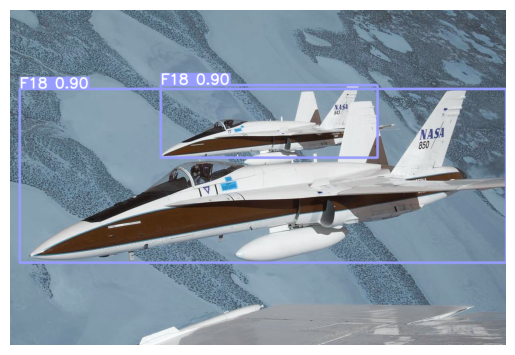

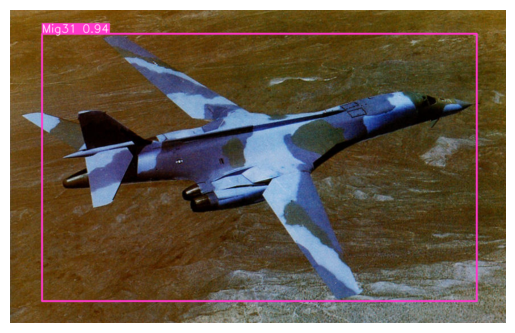

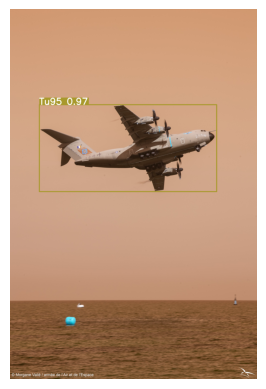

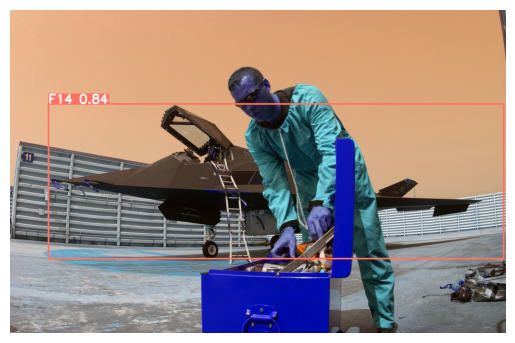

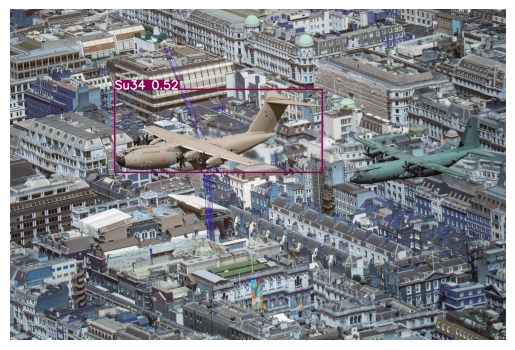

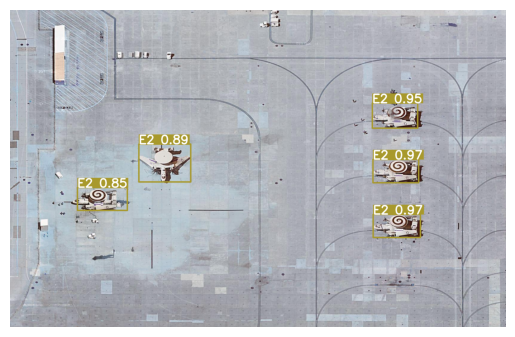

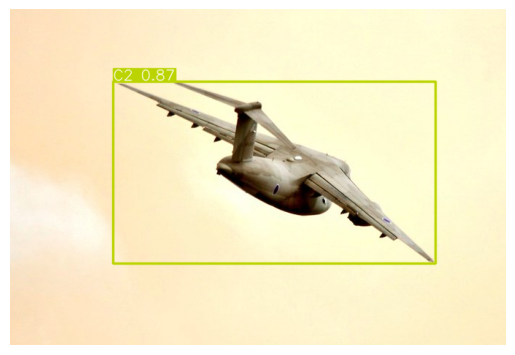

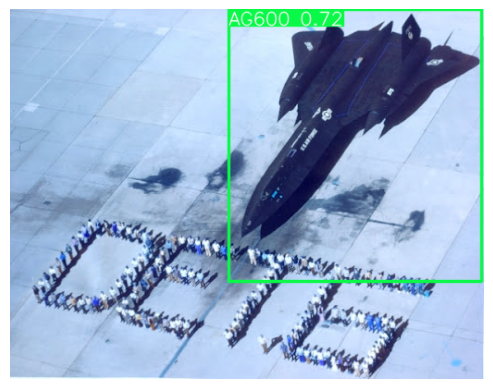

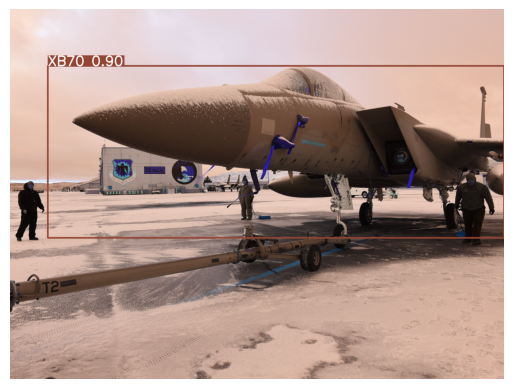

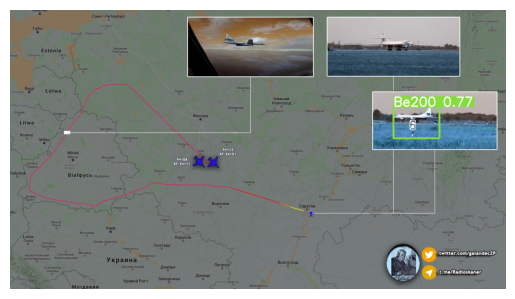

In [43]:
labels_path = []
for i in range(10):
    rand_img = random.choice(os.listdir(valid_images_path))
    img = valid_images_path + rand_img
    plt.figure()
    plt.imshow(model_1_yolov8s_100_epochs.predict(img, save=True)[0].plot())
    plt.axis("off")
    labels_path.append(r"D:\Projects\Military Aircraft Detection\Local\kaggle\input\militaryaircraftdetectiondataset\dataset/" + rand_img[:-3] + "csv")

## 5. Plotting the Results

In [2]:
results_df = pd.read_csv("D:/Projects/Military Aircraft Detection/Local/runs/detect/yolov8s_100_epochs/results.csv")
results_df.head()

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.95081                   3.8454   
1                        2                  0.92926                   3.0118   
2                        3                  1.05950                   2.9849   
3                        4                  1.14240                   3.0507   
4                        5                  1.11620                   2.9467   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.2864                  0.10857                  0.17780   
1                   1.2385                  0.19780                  0.23698   
2                   1.3078                  0.16667                  0.21159   
3                   1.3629                  0.21154                  0.19054   
4                   1.3468                  0.14899                  0.20415   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.06125                  0.04926                  0.70454   
1                  0.08985                  0.06827                  0.83200   
2                  0.08206                  0.05981                  0.97050   
3                  0.08808                  0.06642                  0.94984   
4                  0.09743                  0.07106                  0.98235   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   2.8417                   1.1109                 0.003331   
1                   2.7366                   1.1741                 0.006599   
2                   2.8306                   1.2895                 0.009800   
3                   2.7081                   1.2764                 0.009703   
4                   2.7365                   1.3407                 0.009703   

                    lr/pg1                   lr/pg2  
0                 0.003331                 0.003331  
1                 0.006599                 0.006599  
2                 0.009800                 0.009800  
3                 0.009703                 0.009703  
4                 0.009703                 0.009703

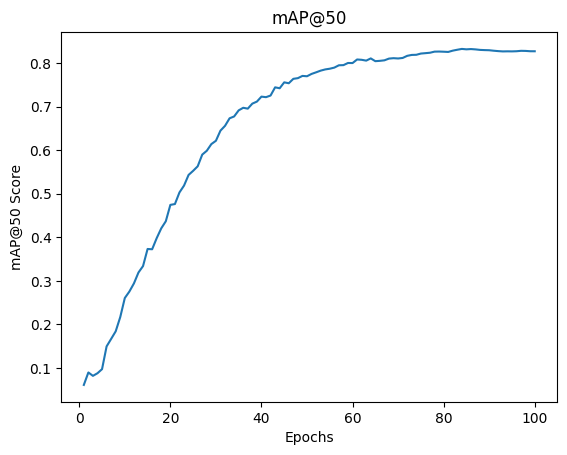

In [5]:
# plotting the MAP@50
plt.plot(range(1, 101), results_df["       metrics/mAP50(B)"])
plt.title("mAP@50")
plt.xlabel("Epochs")
plt.ylabel("mAP@50 Score");

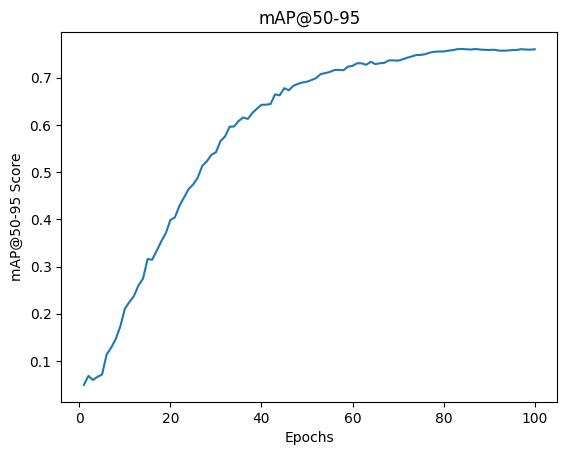

In [6]:
# plotting the MAP@50-95
plt.plot(range(1, 101), results_df["    metrics/mAP50-95(B)"])
plt.title("mAP@50-95")
plt.xlabel("Epochs")
plt.ylabel("mAP@50-95 Score");

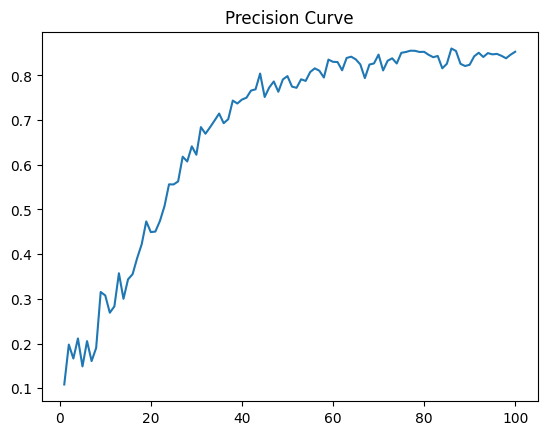

In [11]:
# plotting the Precision
plt.plot(range(1, 101), results_df["   metrics/precision(B)"])
plt.title("Precision Curve");

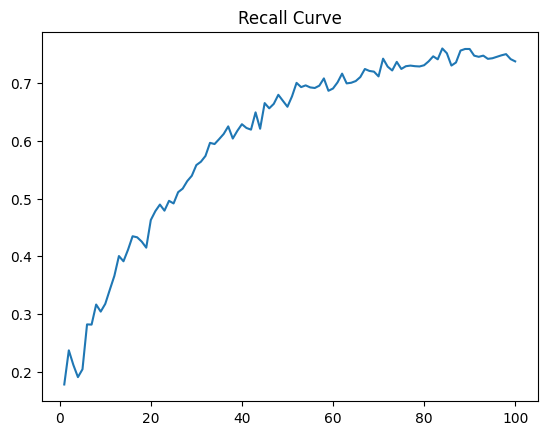

In [13]:
# plotting the Recall
plt.plot(range(1, 101), results_df["      metrics/recall(B)"])
plt.title("Recall Curve");

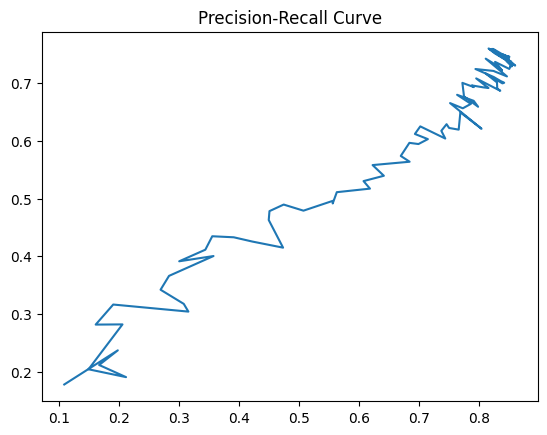

In [16]:
# plotting the Precision-Recall Curve
plt.plot(results_df["   metrics/precision(B)"], results_df["      metrics/recall(B)"])
plt.title("Precision-Recall Curve");

## 6. Building a Streamlit Web app

In [3]:
import ultralytics,torch, torchvision
torch.__version__,ultralytics.__version__, torchvision.__version__

('2.0.1+cpu', '8.0.182', '0.15.2+cpu')

In [5]:
%%writefile requirements.txt
torch==2.1.0
torchvision==0.16.0
numpy==1.24.1
ultralytics==8.0.194

Writing requirements.txt


In [22]:
from ultralytics import YOLO
path="runs/detect/yolov8s_100_epochs/weights/best.pt"
model=YOLO(path)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [31]:
%%writefile app.py
import torchvision
import ultralytics
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import streamlit as st


def predictImage(img, model):
    pred = model.predict(img)[0].plot()
    return pred

def main():
   
    with st.sidebar:
        st.title("About:")
        st.markdown(
            "- Detection of Military Aircraft using Object Detection.\n"\
            "- If you want to identify the aircrafts in an image , you can upload it here."
        )   
    st.title("Militiary Aircraft Detector")
    path="runs/detect/yolov8s_100_epochs/weights/best.pt"
    model=YOLO(path)
    file = st.file_uploader(" Image to process:")
    button = st.button("Submit")

    if button:
        st.snow()
        if not file:
            st.error("Please upload a video or image.")

        else:
                img = plt.imread(file)
                pred = predictImage(img, model)
                st.write("Detected Image:")
                st.image(pred)
if __name__ == "__main__":
   
    main()

Overwriting app.py


In [10]:

print(example_filenames)

['c5.jpg', 'f16.jpg', 'f18.jpg', 'us2.jpg']
